In [1]:
# Прочитаем датасет и выведем первые пять его строк
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [2]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

Однако преобразование столбцов к типам datetime и category «слетело». 

csv-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

ЗАДАНИЕ 1.1

Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [3]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
quarters = melb_df['Date'].dt.quarter
print(quarters.value_counts().iloc[1])

4359


Задание 1.2

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.

В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [4]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Car']
max_unique_count = 150
for col in melb_df.columns:
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude:
        melb_df[col] = melb_df[col].astype('category')
        
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  category      
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

**Сортировка данных в DataFrame**

МЕТОД SORT_VALUES()

Для сортировки значений в *DataFrame* по значениям одного или нескольких столбцов используется метод `sort_values()`.

- `by` — имя или список имён столбцов, по значениям которых производится сортировка.

- `axis` — ось, по которой производится сортировка (**0 — строки, 1 — столбцы**). *По умолчанию* сортировка производится *по строкам*.

- `ascending` — **сортировка по возрастанию** (от меньшего к большему). По умолчанию параметр выставлен на True, *для сортировки по убыванию* (от большего к меньшему) *необходимо выставить его на False*.

- `ignore_index` — создаются ли новые индексы в таблице. *По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.*

- `inplace` — производится ли **замена исходной таблицы на отсортированную.** По умолчанию параметр выставлен на *False*, то есть замены *не производится*. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

CОРТИРОВКА ПО ЗНАЧЕНИЯМ ОДНОГО СТОЛБЦА

Отсортируем таблицу по возрастанию цены объектов недвижимости (Price):

In [5]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


А теперь отсортируем таблицу **по убыванию** (от самой последней до самой первой) даты продажи объекта (Date). Для этого выставим параметр `ascending` на *False*:

In [6]:
melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,...,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,...,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,...,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,...,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0


СОРТРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ

*Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр `by` в виде списка. При этом важно обращать внимание на порядок следования столбцов.*

Oтсортируем таблицу сначала по возрастанию расстояния от центра города (*Distance*), а затем — по возрастанию цены объекта (*Price*). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов *Distance* и *Price* результирующей таблицы:

In [7]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


**Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта**

КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ

Предположим, компания McGrath поручила нам восстановить хронологию продаж таунхаусов, у которых площадь участка существенно больше площади здания, чтобы понять, как часто компания справляется с таким сложным видом объектов. Объекты, проданные в один и тот же день, мы бы хотели сортировать по значению коэффициента соотношения площадей. 

Найдём информацию о таунхаусах (*Type*), проданных компанией (*SellerG*) McGrath, у которых коэффициент соотношения площадей здания и участка (*AreaRatio*) **меньше -0.8**. Результат отсортируем по дате продажи (*Date*) в порядке **возрастания**, а после проведём **сортировку по убыванию** коэффициента соотношения площадей.

Также **обновим старые индексы на новые**, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы *Data* и *AreaRatio*:

In [8]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


**Примечание**. Старайтесь не сочетать фильтрацию и метод `sort_values()` с параметром *inplace=True*, так как в таком случае у вас возникнет предупреждение (**warning**) 
SettingWithCopyWarning: melb_df[melb_df['Rooms'] > 5].sort_values(inplace=True, by=['Rooms']):

C:\Users\Andrey\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingwithCopyWarning:

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ indexing. html#retu rning-a-view-versus-a-copy

    return func(*args, **kwargs)

Стоит отметить, что **это не ошибка и код в таком случае отработает**. Однако Pandas предупреждает вас о том, что **при использовании такого кода дальнейшие результаты могут быть неожиданными**.

Это предупреждение предназначено *для обозначения операций «цепного присваивания».* Это ситуация, когда вы пытаетесь напрямую изменить подмножество исходных данных. В нашем случае мы **пытаемся отсортировать данные с заменой** (об этом говорит параметр *inplace=True*) **исходной таблицы на отсортированную.**

Чтобы не возникало подобных конфликтов, необходимо использовать метод `copy()` для явного создания копии отфильтрованного подмножества исходных данных и *работать уже с ней* (производить сортировку):

filtered = melb_df[melb_df['Rooms'] > 5].copy()

filtered.sort_values(inplace=True, by=['Rooms'])

filtered.head()

**Задание 2.2**
Произведите сортировку столбца `AreaRatio` по возрастанию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [9]:
melb_df.sort_values(
    by='AreaRatio',
    ascending=False,
    ignore_index=True
    ).loc[1558, 'BuildingArea']

126.0

**Задание 2.3**
Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

**Подсказки**

*Подсказка (1 из 4): Произведите фильтрацию таблицы и отберите строки по условиям «тип здания — таунхаус» и «число жилых комнат больше 2».*

*Подсказка (2 из 4): Отсортируйте полученную таблицу по столбцу Rooms с параметром ascending=True (по возрастанию) и по средней площади комнат с параметром ascending=False (по убыванию).*

*Подсказка (3 из 4): Выставьте параметр ignore_index на True, чтобы заменить индексы на новые.*

*Подсказка (4 из 4): С помощью метода loc извлеките значение столбца Price в строке с индексом 18.*

In [10]:
mask1 = melb_df['Type'] == 'townhouse'
mask2 = melb_df['Rooms'] > 2
int(melb_df[mask1&mask2].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True
).loc[18, 'Price'])


1300000

**Группировка данных в DataFrame**

Благодаря группировке мы можем выявлять признаки, которые не несут статистической значимости, или признаки, которые вносят наибольший вклад. 

МЕТОД GROUPBY()

`.groupby()` - Метод для группировки данных по одному или нескольким признакам

Основные параметры:

`by` — имя или список имён столбцов, по которым производится группировка.

`axis` — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.

`as_index` — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Возвращает объект `DataFrameGroupby`

К этому объекту можно применять уже знакомые нам агрегирующие методы (`mean`, `median`, `sum` и т. д.), чтобы рассчитывать показатели внутри каждой группы.

Сначала мы разделяем данные на группы с помощью метода `groupby()`, после чего к каждой группе применяем *агрегацию* и *объединяем* результаты *в новую таблицу.*

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ

Применим агрегирующую функцию среднего к результату работы `groupby()`. В качестве **столбца для группировки** возьмём столбец типа объекта недвижимости (`Type`):

In [11]:
melb_df.groupby(by='Type').mean(numeric_only=True)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\2774055988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(by='Type').mean(numeric_only=True)


,Rooms,Price,Distance,Postcode,Bedroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


Мы получили таблицу, на пересечении строк и столбцов которой находятся средние значения каждого числового признака в наших данных.

Теперь на месте индексов стоят значения типа объекта недвижимости Type 

**Примечание**. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр `as_index` на `False`:

Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу.

In [12]:
# Сравним средние цены на объекты в зависимости от типа
melb_df.groupby('Type')['Price'].mean()

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\2908779680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Type')['Price'].mean()


Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

**Примечание**. Обратите внимание, что, так как мы считаем только один показатель (среднее) для одного столбца, в результате мы получаем объект Series.

Выясним, какие регионы (*Regionname*) наиболее удалены от центра Мельбурна

In [13]:
# найдём минимальное значение расстояния от центра 
# города до объекта в зависимости от его региона

# Результат отсортируем по убыванию расстояния
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\4012052661.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)


Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

Наиболее удаленными являются все регионы *Victoria*

**ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ**

Чтобы рассчитать **несколько** агрегирующих методов, можно воспользоваться методом `agg()`, который принимает *список строк с названиями агрегаций*

Построим таблицу для анализа продаж по месяцам. 

Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). 

Результат отсортируем по количеству продаж в порядке убывания:

In [14]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\3700124206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('MonthSale')['Price'].agg(


,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


**Примечание**. Обратите внимание, что, так как мы считаем несколько показателей для одного столбца, в результате мы получаем объект *DataFrame*.

В результате применения метода `agg()`, в который мы передали список с названиями интересующих нас агрегирующих функций, мы получаем *DataFrame* со столбцами `count`, `mean` и `max`, где для каждого месяца рассчитаны соответствующие параметры. Результат сортируем по столбцу `count`.

**Примечание**. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом `agg()`, передав в качестве его параметра строку `'describe'`:

In [15]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\701566850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('MonthSale')['Price'].agg('describe')


,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является **подсчёт числа уникальных значений.**

Так, например, мы можем **вычислить число уникальных риелторских компаний в зависимости от региона**, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода `agg()` строку `'nunique'`. 

Более того, метод `agg()` поддерживает использование и других функций. Передадим дополнительно встроенную функцию `set`, чтобы **получить множество из агентств недвижимости, которые работают в каждом из регионов:**

In [16]:
melb_df.groupby('Regionname')['SellerG'].agg(
    ['nunique', set]
)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\2609171922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['SellerG'].agg(


,nunique,set
Regionname,,
Eastern Metropolitan,26,"{RW, other, Noel, RT, HAR, Stockdale, Love, Ga..."
Eastern Victoria,11,"{other, Harcourts, McGrath, Fletchers, Barry, ..."
Northern Metropolitan,40,"{RW, other, RT, Eview, HAR, Collins, McDonald,..."
Northern Victoria,11,"{other, McGrath, Buckingham, Barry, hockingstu..."
South-Eastern Metropolitan,25,"{RW, other, Noel, Eview, HAR, Stockdale, Gary,..."
Southern Metropolitan,38,"{RW, other, Noel, RT, Eview, HAR, Collins, Sto..."
Western Metropolitan,34,"{RW, other, RT, HAR, McDonald, Stockdale, Brad..."
Western Victoria,6,"{other, hockingstuart, Raine, HAR, Ray, YPA}"


Как и ожидалось, **наименьшая** конкуренция в наиболее удалённом регионе *Western Victoria*, а **наибольшая** — в центральном районе *Northern Metropolitan*.

**Задания**

**Задание 3.1**

Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [17]:
melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

**Задание 3.2**


Какой регион имеет наименьшее стандартное отклонение по географической широте (`Lattitude`)?
В качестве ответа запишите название этого региона.

In [18]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values()

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\2833887339.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby('Regionname')['Lattitude'].std().sort_values()


Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

**Задание 3.3**

Какая риелторская компания (`SellerG`) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?
Для ответа на этот вопрос рассчитайте сумму продаж (`Price`) каждой компании в заданный период.
Не забудьте перевести даты в формат datetime.

**Подсказки**

Произведите фильтрацию по условию попадания данных о продажах в интервал указанных дат.

Сгруппируйте данные по признаку SellerG и посчитайте сумму продаж для каждой компании.

 Отсортируйте данные по возрастанию.

In [19]:
# Переводим даты в DateTime для дальнейшего сравнения
date1 = pd.to_datetime('2017-05-01')
date2 = pd.to_datetime('2017-09-01')
# Проводим фильтрацию по попаданию даты 
# в таблице в заданный промежуток
mask = (date1 <= melb_df['Date']) & (melb_df['Date'] <= date2)

melb_df[mask].groupby('SellerG')['Price'].sum().sort_values(ascending=True)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\2907987351.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df[mask].groupby('SellerG')['Price'].sum().sort_values(ascending=True)


SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

**Сводные таблицы**

 **Сводная таблица** принимает на вход данные из отдельных столбцов и группирует их. В *результате* получается *новая таблица*, которая позволяет увидеть многомерное обобщение данных. Таким образом, благодаря сводным таблицам мы *можем оценить зависимость между двумя и более признаками данных*.

Мы чаще сталкиваемся со сводными таблицами, чем с обычными, в **плоском виде**, так как сводные таблицы удобнее для анализа и быстрых выводов, а также позволяют увидеть более общие зависимости между признаками, нежели простая группировка данных.

*Под «плоским видом» подразумевается, что индексами являются номера строк, а столбцами — имена столбцов.*

МЕТОД GROUPBY КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

Мы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:

In [20]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (`Type`). Для этого в параметрах метода `groupby()` укажем список из нескольких интересующих нас столбцов.

In [21]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1929913328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(['Rooms', 'Type'])['Price'].mean()


Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем *Series*, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется **иерархической**. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде **сводной таблицы** (первый группировочный признак по строкам, а второй — по столбцам), а не в виде *Series* с иерархическими индексами, к результату чаще всего применяют метод `unstack()`, который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [22]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\442157687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()


Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


В результате мы получаем сводную таблицу, **столбцы** в которой представляют *типы* домов (house, townhouse, unit), **строки** — число комнат, а на пересечении строк и столбцов находится средняя стоимость объекта с такими показателями.

ВЫВОДЫ ПО ТАБЛИЦЕ

1.
**Пропуски** в сводной таблице (*NaN*) говорят о том, что в наших данных **нет соответствующих комбинаций признаков**. Например, у нас нет информации о ценах на таунхаусы, где количество комнат больше пяти.

2.
**Наибольшей средней стоимостью** (2,25 млн. австралийских долларов) обладают объекты типа *unit* с восемью жилыми комнатами. **Наименьшая средняя стоимость** — у однокомнатных домов типа *unit* (чуть меньше 400 тыс. австралийских долларов).

3.
Сколько бы комнат ни было в доме, **цена на объекты типа unit всегда ниже других** (за исключением восьмикомнатных объектов).

МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЕ СВОДНЫХ ТАБЛИЦ

Для построения сводных таблиц существует специальный и более простой метод — `pivot_table()`.

Давайте построим ту же самую таблицу, но уже с использованием метода `pivot_table`. В качестве параметра values укажем столбец `Price`, в качестве индексов сводной таблицы возьмём `Rooms`, а в качестве столбцов — `Type`. *Агрегирующую функцию* оставим по умолчанию (среднее). Дополнительно *заменим пропуски* в таблице на значение 0. Финальный результат для наглядности вывода округлим с помощью метода `round()` до целых.

In [23]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\3628189379.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


Несложно понять, что метод `pivot_table()` имеет преимущество перед группировкой по нескольким критериям. Оно заключается в наличии специальных **аргументов** для строк и столбцов сводной таблицы

In [24]:
# Проанализируем продажи в каждом регионе 
# в зависимости от дня недели (будний или выходной)
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)


C:\Users\geras\AppData\Local\Temp\ipykernel_6120\4097367969.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


Из результирующей таблицы можно сделать два вывода:

1
Число продаж резко возрастает в выходные вне зависимости от региона (приблизительно в 2-3 раза). То есть вероятность того, что дом продадут в выходные, гораздо выше вероятности, что его продадут в будний день.

2
В отдалённых регионах (Victoria) коэффициент роста числа продаж выше, чем в центральных. Если в центральных регионах Metropolitan продажи по выходным в 2-2.5 раза выше, чем по будням, то в регионах Victoria число продаж в выходные вырастает примерно в 3 раза.

Такой рост можно даже попытаться объяснить логически: в выходные дни у людей появляется свободное время, чтобы доехать до отдалённых пригородов с целью покупки дома.

Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (*Landsize*) от типа объекта (*Type*) и его региона (*Regionname*). 

**обозначения**

`values` - то, что будет в ячейках

`index` - строки

`columns` - столбцы

`aggfunc` - дополнительные столбцы

`fill_value` - пустые значения

In [25]:
# Передадим в аргумент список агрегирующих функций
# В сводной таблице заменим пустые значения на 0
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\4049984843.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(
C:\Users\geras\AppData\Local\Temp\ipykernel_6120\4049984843.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


median                          mean              \
Type                        house townhouse   unit        house   townhouse   
Regionname                                                                    
Eastern Metropolitan        674.0     233.5  203.0   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230.0  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0.0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0.0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199.0   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0.0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62.0   507.883406  244.560669   
Western Victoria            599.5       0.0    0.0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

*Медианное и среднее значения рассчитаны отдельно для каждой комбинации признаков*

МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр `index` или параметр `columns`.

Построим таблицу, в которой по индексам будут располагаться признаки метода продажи (*Metod*) и типа объекта (*Type*), по столбцам - наименование региона (*Regionname*), а на пересечении строк и столбцов - медианная цена объекта (*Price*):

In [26]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1809242545.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  melb_df.pivot_table(


Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                 1244000.0          780000.0   
       townhouse              760000.0               0.0   
       unit                   650000.0               0.0   
S      house                 1127000.0          675000.0   
       townhouse              828000.0               0.0   
       unit                   645750.0          492000.0   
SA     house                  932500.0          950000.0   
       townhouse              807500.0               0.0   
       unit                        0.0               0.0   
SP     house                 1050000.0          672500.0   
       townhouse              910000.0               0.0   
       unit                   515000.0          400000.0   
VB     house                 1100000.0          712500.0   
       townhouse              892500.0               0.0   
       unit                   500000.0               0.0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                   900000.0           500000.0   
       townhouse               632500.0                0.0   
       unit                    410000.0                0.0   
S      house                   920000.0           555000.0   
       townhouse               750000.0                0.0   
       unit                    525500.0                0.0   
SA     house                   817500.0           540000.0   
       townhouse               425000.0                0.0   
       unit                    616000.0                0.0   
SP     house                   900000.0           521000.0   
       townhouse               690000.0                0.0   
       unit                    470000.0                0.0   
VB     house                  1050000.0           690000.0   
       townhouse               640000.0                0.0   
       unit                    450000.0                0.0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                        865000.0              1725000.0   
       townhouse                   1190000.0              1055000.0   
       unit                         525000.0               571250.0   
S      house                        883300.0              1611000.0   
       townhouse                    875000.0              1135000.0   
       unit                         606000.0               655000.0   
SA     house                        880000.0              1390000.0   
       townhouse                         0.0              1141000.0   
       unit                              0.0               580000.0   
SP     house                        770000.0              1521750.0   
       townhouse                    800000.0              1162500.0   
       unit                         601000.0               550000.0   
VB     house                        850000.0              1800000.0   
       townhouse                         0.0              1250000.0   
       unit                         700000.0               500000.0   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                  870000.0          630000.0  
       townhouse              670000.0               0.0  
       unit                   360000.0               0.0  
S      house                  870000.0          397500.0  
       townhouse              729000.0               0.0  
       unit                   489000.0               0.0  
SA     house                  772500.0               0.0  
       townhouse              467500.0               0.0  
       unit                   571000.0               0.0  
SP     house                  865000.0          360000.0  
       t

**Первый индекс** - метод продажи здания, **далее** для метода - тип недвижимости

**По столбцам** расположены регионы

**В ячейках** - медианная цена для каждой такой комбинации

С помощью таких таблиц модно более глубоко исследовать закономерности.

ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ

Запищем сводную таблицу, которую мы создавали ранее в переменную `pivot`:

In [27]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1672652905.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(
C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1672652905.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(


In [28]:
# Выведем столбцы с помощью атрибута columns
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

Результат - объект *Multiindex*, который хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть шесть возможных вариантов обращения к столбцам таблицы.

Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. **Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.**

Так, из таблицы `pivot` мы можем получить средние значения площадей участков для типа здания `unit`, просто **последовательно обратившись по имени столбцов**:

In [29]:
display(pivot['mean', 'unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: (mean, unit), dtype: float64

Аналогично проводится фильтрация данных

In [30]:
# Отфильтруем регионы, в которых средняя площадь 
# здания для *house* меньше их медианной площади
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                        mean              \
Type                   house townhouse  unit       house   townhouse   
Regionname                                                             
Southern Metropolitan  586.0     246.0   0.0  569.643881  278.858824   
Western Metropolitan   531.0     198.0  62.0  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

In [31]:
# Получим индексы отфильтрованной таблицы
# Воспользуемся атрибутом index и обернем результат в список
print(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']


**Создание мультииндексных таблиц вручную**

In [33]:
import numpy as np
mser = pd.Series(
    np.random.rand(8),
    index=[['white','white','white','blue','blue','red','red','red'],
           ['up','down','right','up','down','up','down','left']]
)
display(mser)

white  up       0.580260
       down     0.778969
       right    0.377631
blue   up       0.722268
       down     0.083865
red    up       0.043903
       down     0.027662
       left     0.578815
dtype: float64

*В данном примере мы создаём объект Series со вложенными индексами. Мы передаём в качестве индексов Series вложенный список, где первый список задаёт внешний уровень вложенности, а второй список — внутренний уровень вложенности. Значения Series — случайные числа от 0 до 1, сгенерированные функцией np.random.rand() (ваши значения могут отличаться).*

*Если посмотреть на индексы Series, можно увидеть, что они являются мультииндексами:*

In [34]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


Аналогично создаются `DataFrame` со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр `columns` при инициализации таблицы:

In [36]:
mframe = pd.DataFrame(
    np.random.rand(16).reshape(4,4),
    index=[['white', 'white', 'red', 'red'],
           ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'], [1, 2, 1, 2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    0.044008  0.800740  0.316004  0.703878
      down  0.962862  0.050437  0.806212  0.715319
red   up    0.036821  0.099885  0.548133  0.849166
      down  0.656558  0.812229  0.656976  0.199592

**Задание 4.2**

Составьте сводную таблицу, которая показывает зависимость медианной площади (*BuildingArea*) здания от типа объекта недвижимости (*Type*) и количества жилых комнат в доме (*Rooms*). **Для какой комбинации признаков площадь здания наибольшая?**

В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [37]:
pivot = melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)
display(pivot)

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1854176627.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(


Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126.0,126.0,141.0,177.0,126.0,216.5,126.0,126.0
townhouse,88.0,114.0,126.0,159.5,152.0,0.0,0.0,0.0,0.0
unit,69.5,110.0,126.0,126.0,0.0,171.0,0.0,126.0,0.0


**Задание 4.3**

Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (*Price*) от риелторского агентства (*SellerG*) и типа здания (*Type*).

Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа *unit* максимальна. В качестве ответа запишите название этого агентства.

In [39]:
pivot = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
)
max_unit_price = pivot['unit'].max()
print(pivot[pivot['unit'] == max_unit_price].index[0])

C:\Users\geras\AppData\Local\Temp\ipykernel_6120\1156440549.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = melb_df.pivot_table(


Nick


**5. ОБЪЕДИНЕНИЕ DATAFRAME: Знакомимся с новыми данными**

Обзор данных:

`ratings1` и `ratings2` — таблицы с данными о выставленных пользователями оценках фильмов.

- `userId` — уникальный идентификатор пользователя, который выставил оценку;

- `movieId` — уникальный идентификатор фильма;

- `rating` — рейтинг фильма.

`dates` — таблица с датами выставления всех оценок.

- `date` — дата и время выставления оценки фильму.

`movies` — таблица с информацией о фильмах.

- `movieId` — уникальный идентификатор фильма;

- `title` — название фильма и год его выхода;

- `genres` — жанры фильма.

Получим **единую таблицу** с рейтингами, датами их выставления и информацией о фильмах:

1. Склеим таблицы `ratings1` и `ratings2` в единую структуру.

2. К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, *склеив столбцы таблиц между собой.*

3. Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

In [58]:
import pandas as pd

movies = pd.read_csv('data/movies_data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
movies['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

In [60]:
ratings1 = pd.read_csv('data/movies_data/ratings1.csv')
ratings1.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [61]:
ratings1['userId'].value_counts()

userId
68     1260
249    1046
182     977
177     904
232     862
       ... 
189      20
194      20
207      20
53       20
257      20
Name: count, Length: 274, dtype: int64

In [62]:
dates = pd.read_csv('data/movies_data/dates.csv')
dates.head()

,date
0,2000-07-30 18:45:03
1,2000-07-30 18:20:47
2,2000-07-30 18:37:04
3,2000-07-30 19:03:35
4,2000-07-30 18:48:51


In [63]:
dates.value_counts()

date               
2016-04-04 16:39:58    128
2016-04-04 16:39:57    124
2016-04-04 16:39:56     85
1996-03-29 18:36:56     37
2016-04-04 16:39:55     37
                      ... 
2007-05-14 16:29:28      1
2007-05-14 16:29:26      1
2007-05-14 16:29:22      1
2007-05-14 16:28:51      1
2018-09-24 14:27:30      1
Name: count, Length: 85043, dtype: int64

**6. Объединение DataFrame: concat**

Для склейки таблиц воспользуемся функцией *Pandas* `concat()`, позволяющей конкатенировать (склеивать) таблицы как по строкам, так и по столбцам

Основные параметры функции:

`objs` — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

`axis` — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

`join` — либо inner (пересечение), либо outer (объединение); 

`ignore_index` — по умолчанию установлено значение *False*, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение *True*, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.


Для **корректной** конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — **идентичное число и имена столбцов.**

Склеим таблицы `ratings1` и `ratings2`

**Примечание**. Обратите внимание, что `concat` является **функцией библиотеки**, а не методом *DataFrame*. Поэтому её вызов осуществляется как `pd.concat(...)`.

In [65]:
ratings2 = pd.read_csv('data/movies_data/ratings2.csv')
ratings2.head()

,userId,movieId,rating
0,274,5621,2.0
1,274,5630,3.0
2,274,5667,3.5
3,274,5679,3.5
4,274,5690,3.0


In [66]:
ratings = pd.concat([ratings1, ratings2])
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


Результат - увеличенная первая таблица за счет добавленных снизу строк второй таблицы

Чтобы создать новые индексы, выставим параметр `ignore_index` на *True*

In [68]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


Узнаем количество строк в таблицах `ratings` и `dates`, чтобы в дальнейшем вертикально склеить их между собой:

In [69]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


При выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (`ratings1` и `ratings2`). В результате конкатенации случилось **дублирование строк**. В данном примере их легко *найти* — выведем *последнюю* строку таблицы `ratings1` и *первую* строку таблицы `ratings2`:

In [70]:
display(ratings1.tail(1))
display(ratings2.head(1))

,userId,movieId,rating
40000,274,5621,2.0


,userId,movieId,rating
0,274,5621,2.0


Чтобы очистить таблицу от дублей, мы можем воспользоваться методом DataFrame `drop_duplicates()`, который удаляет повторяющиеся строки в таблице. Не забываем **обновить индексы** после удаления дублей, выставив параметр `ignore_index` в методе `drop_duplicates()` на значение *True*:

In [71]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])

Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы `ratings` и `dates` по столбцам:

In [72]:
ratings_dates = pd.concat([ratings, dates], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


**Задание 6.3**

В ваше распоряжение предоставлена директория users `('./Root/users')`. В данной директории содержатся csv-файлы, в каждом из которых хранится информация об идентификаторах пользователей (`user_id`) и ссылки на их фотографии (`image_url`). Файлов в директории может быть сколько угодно.

Вам необходимо написать функцию `concat_user_files(path)`, параметром которой является path — путь до директории. Функция должна объединить информацию из предоставленных вам файлов в один DataFrame и вернуть его.

Список названий всех файлов, находящихся в директории, вы можете получить с помощью функции `os.listdir(path)` из модуля os. Отсортируйте полученный список, прежде чем производить объединение файлов.

Обратите внимание, что метод `os.listdir()` возвращает только названия файлов в указанной директории, а при чтении файла необходимо указывать полный путь до него.

Не забудьте обновить индексы результирующей таблицы после объединения.

**Примечание**. Учтите, что на тестовом наборе файлов в результате объединения могут возникнуть дубликаты, от которых необходимо будет избавиться.

In [ ]:
import pandas as pd
import os

def concat_user_files(path):
    data = pd.DataFrame()
    file_names = os.listdir(path)
    file_names.sort()
    for file in file_names:
        tmp_data = pd.read_csv(path + '/' + file)
        data = pd.concat([data, tmp_data], axis=0, ignore_index=True)
    data = data.drop_duplicates()
    return data

In [ ]:
import os

def concat_users_files(path):
    file_name = os.listdir(path)
    file_name = sorted(file_name)
    print('Файлы в папке: ', file_name)
    for i in range(len(file_name)-1):
        if i == 0:
            df_dates = pd.read_csv(path + '/' + file_name[i])
        else:
            date = pd.read_csv(path + '/' + file_name[i])
            df_dates = pd.concat([df_dates, date], ignore_index=True)
    df_dates = df_dates.drop_duplicates()
    return df_dates

if __name__ == '__main__':
    data = concat_users_files('C:/1')
data

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'C:/1'

In [ ]:
import os
path = './Root/users'
result = pd.DataFrame()
def concat_user_files(path):
    for name in os.listdir(path):
        q = pd.read_csv(path + '/' + name).sort_values(by='user_id', ignore_index=True)
        print(q)
        result = pd.concat([result, q], ignore_index=True)
        result = result.drop_duplicates(ignore_index=True)
    result = result.sort_values(by='user_id', ignore_index=True)
    print(result)
    

**7. Объединение DataFrame: join, merge**

ТИПЫ ОБЪЕДИНЕНИЙ

Типы объединений представлены в виде **Кругов Эйлера**

*Это геометрический способ отобразить оношения между множествами*

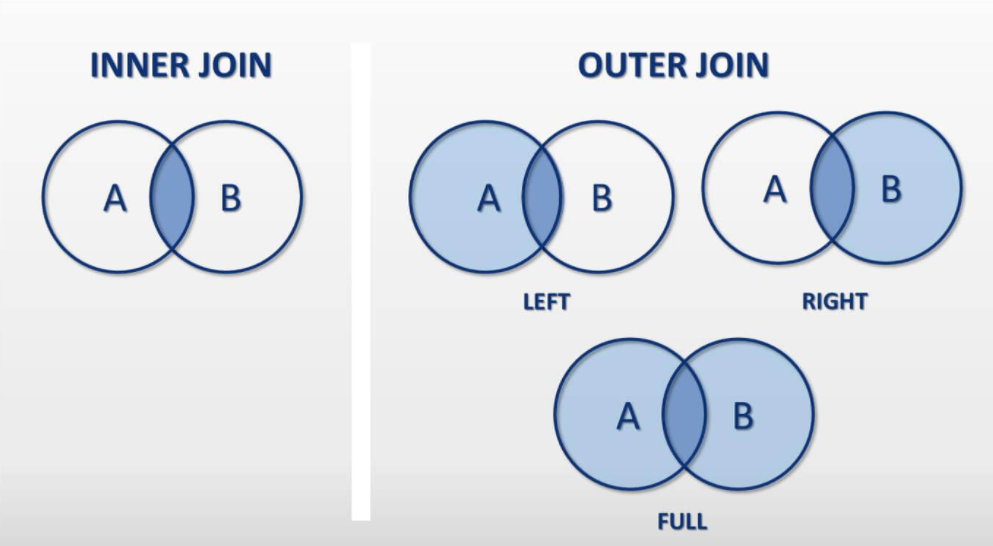

ДВА ОСНОВНЫХ ТИПА ОБЪЕДИНЕНИЯ ТАБЛИЦ:

1. **inner** (Внутреннее) *пересечение*

В результате появляются **только те** записи, которые есть в **обеих** таблицах

Строки без совпадений удаляются 

2. **outher** (Внешнее)

Делится на три подтипа:

- **full** — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.

*объединение*

- **left** — для всех записей из «левой» таблицы ведётся поиск соответствий в «правой»

В результате остаются только те значения, которым **были найдены соответствия**

*вычитание*

- **right** — аналогично предыдущему, но остаются значения только из «правой» таблицы. 

*вычитание*



*Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).*

МЕТОД ОБЪЕДИНЕНИЯ JOIN

`.join()` - метод для объединения таблиц по индексам, либо по ключевому столбцу

**На вход** - 

**Основные параметры:**

`other` — таблица, которую мы присоединяем. При объединении она является **«правой»**, а исходная таблица, от имени которой вызывается метод, является «левой».

`how` — параметр *типа* объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). *По умолчанию параметр установлен на '**left**'.*

`on` — параметр, который определяет, по какому столбцу в «левой» таблице **происходит объединение по индексам из «правой».**

`lsuffix` и `rsuffix` — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

`joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)`

Схема работы метода `join()` в зависимости от типа объеддинения:

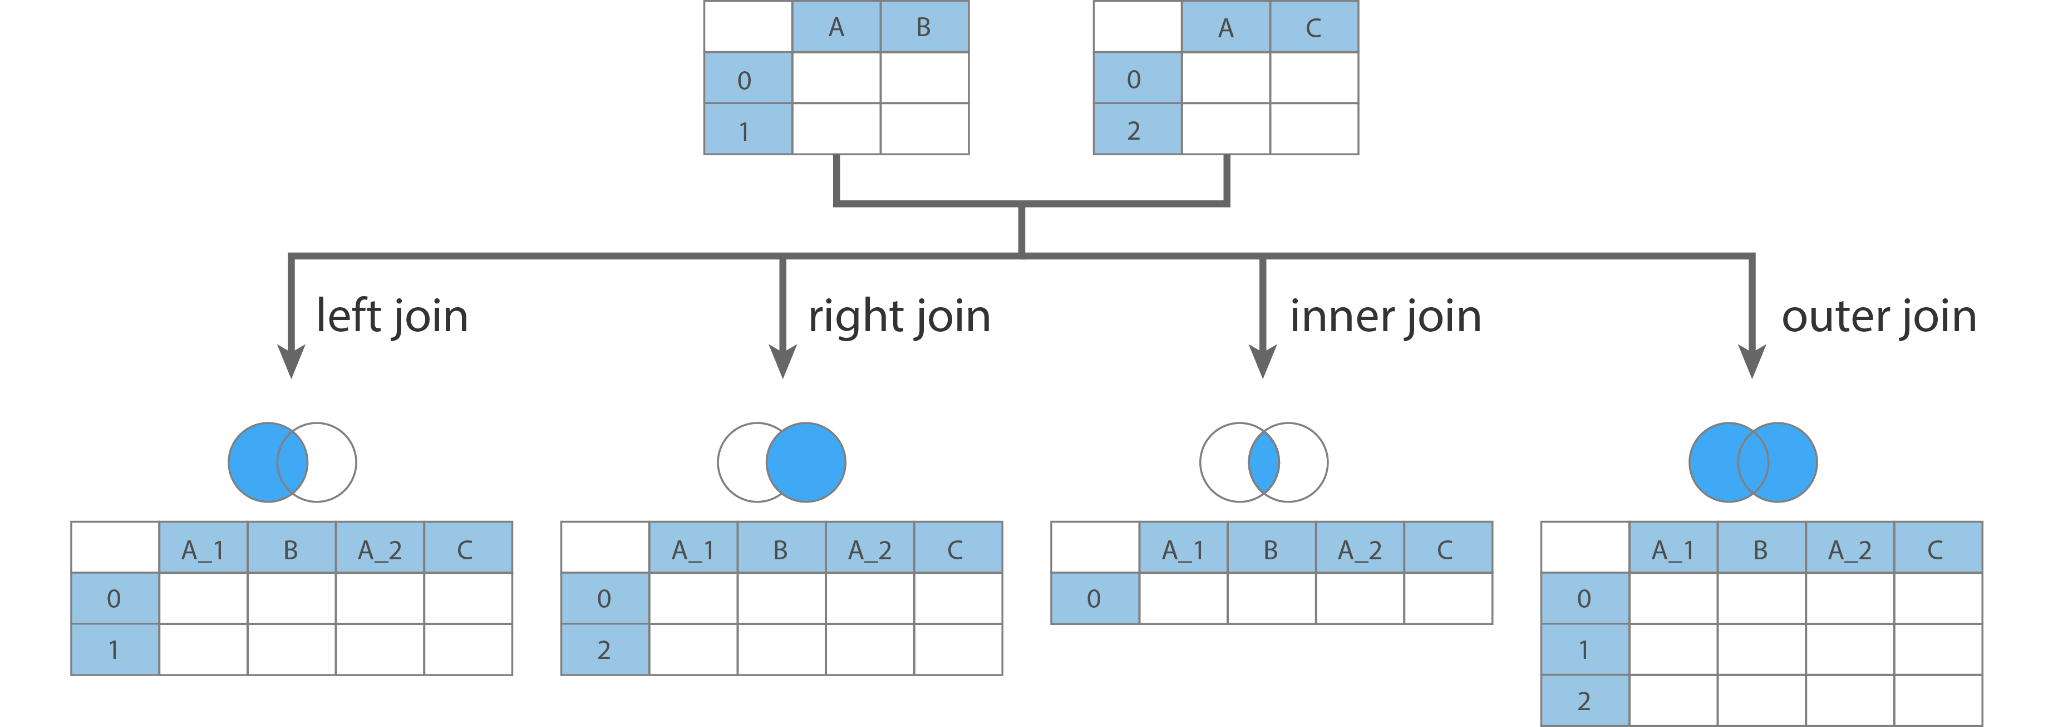

Если использовать метод `join()` «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

In [77]:
# Установим один из суфиксов, чтобы избежать ошибки
joined_false = ratings_dates.join(
    # Исходная - левая таблица
    movies,
    # Суфикс
    rsuffix='_right',
    # Тип объединения (вычитание)
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


*При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения left.*

In [80]:
joined_false1 = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='outer'
)
display(joined_false1)

,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


*В данном случае у нас получилось два столбца, соответствующих идентификатору фильма: один — из «левой» таблицы (movieId), а другой — из «правой» (movieId_right).*

Однако такая таблица неинформативна. Чтобы совместить таблицы по ключевому столбцу с помощью метода `join()`, необходимо использовать **ключевой столбец в «правой»** таблице в качестве индекса. Это можно сделать с помощью метода `set_index()`. Также необходимо указать название ключа в параметре `on`.

In [81]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


*В результате такого объединения для каждого идентификатора фильма `movieId` в таблице `ratings_dates` найден совпадающий с ним идентификатор `movieId` в таблице `movies` и присоединена информация о самом фильме (``title`` и ``genres``). Это как раз то, что нам нужно.*

МЕТОД ОБЪЕДИНЕНИЯ MERGE

`.merge()` - Метод для слияния двух таблиц по ключевым столбцам или по индексам

**На вход** - Таблица для объединения

**Основные параметры:**

`right` — **присоединяемая** таблица. По умолчанию она является *«правой»*.

`how` — параметр **типа** объединения. По умолчанию принимает значение *'inner'*.

`on` — параметр, который определяет, **по какому столбцу происходит объединение**. Определяется автоматически, но *рекомендуется указывать вручную.*

`left_on` — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр **отвечает за наименования ключевого столбца исходной таблицы.**

`right_on` — аналогично предыдущему, параметр отвечает за **наименование ключевого столбца присоединяемой таблицы.**

→ Метод `merge()` в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он **не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы.** Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. 

Таким образом, `merge()` проще в использовании и более многофункционален, чем схожие методы.

In [82]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [85]:
# Проверим, что число строк в таблице ratings_dates
# совпадает с числом строк в результирующей таблице
# merged:

print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE()

Выбор в пользу типа объединения `left`, а не `full`:

In [86]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())

Число строк в таблице merged2:  100854


,userId,movieId,rating,date,title,genres
100849,184.0,193581,4.0,2018-09-16 14:44:42,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100850,184.0,193583,3.5,2018-09-16 14:52:25,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100851,184.0,193585,3.5,2018-09-16 14:56:45,Flint (2017),Drama
100852,184.0,193587,3.5,2018-09-16 15:00:21,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
100853,331.0,193609,4.0,2018-09-17 04:13:26,Andrew Dice Clay: Dice Rules (1991),Comedy


**Результирующее число строк в таблице увеличилось** за счет того, что в таблице `movies` содержались фильмы, которым еще не были выставлены оценки.

 В результате объединения типом `full outer` информация о фильмах перенеслась из таблицы `movies` в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы `ratings_dates` заполнились пропусками (`NaN`). Такие фильмы были записаны в **конец таблицы.**

In [87]:
# Объединим таблицы ratings1 и ratings2

merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


**Примечание**

В результате применения `merge` автоматически удаляются дубликаты, которые мы видели прииспользовании метода `concat()`

ВЫБОР МЕТОДА ОБЪЕДИНЕНИЯ

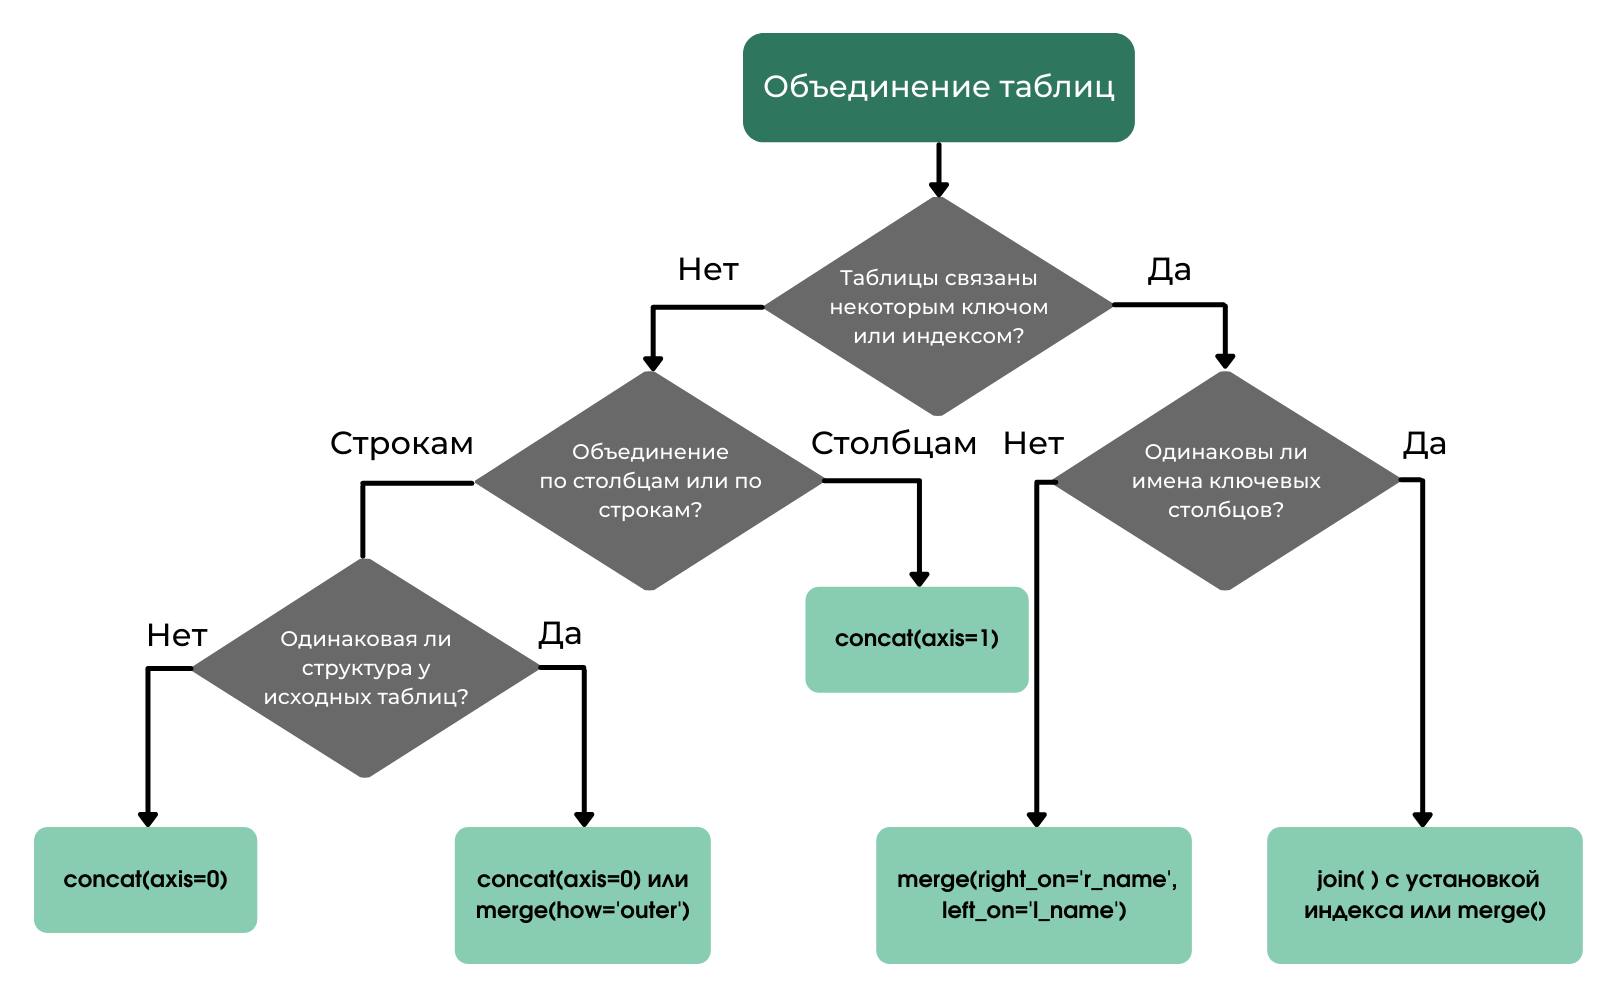

In [92]:
a = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [103, 214, 124], 'C': [1, 4, 2]})
b = pd.DataFrame({'V': ['d', 'b', 'c'], 'U': [1393.7, 9382.2, 1904.5], 'C': [1, 3, 2]})
a.merge(b, how='right', on='C')
display(a)

,A,B,C
0,a,103,1
1,b,214,4
2,c,124,2


**Задание 7.5**

Даны две таблицы: `items_df`, в которой содержится информация о наличии товаров на складе, и `purchase_df` с данными о покупках товаров.

Информация в таблицах представлена в виде следующих столбцов:

`item_id` — идентификатор модели;

`vendor` — производитель модели;

`stock_count` — имеющееся на складе количество данных моделей (в штуках);

`purchase_id` — идентификатор покупки;

`price` — стоимость модели в покупке.

Вам необходимо сделать следующее:

Сформируйте DataFrame `merged`, так чтобы после объединения `purchase_df` и `items_df` **остались модели, которые учтены на складе и имели продажи.**

На основе таблицы `merged` найдите **суммарную выручку**, которую можно было бы получить от продажи всех товаров, имеющихся на складе. Результат занесите в переменную `income`.

In [97]:
items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})

purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})

merged = items_df.merge(
    purchase_df,
    how='inner',
    on='item_id'
)
income = (merged['price'] * merged['stock_count']).sum()
display(income)

19729490